**EDA**

This notebook constitutes our exploratory data analysis. It is also the notebook used for generating the plots that are included in our report.

In [306]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from typing import List
import pandas as pd
import re

In [307]:
df_prices_train = pd.read_csv("train.csv")
print("Property Prices train dataset", df_prices_train.shape)
display(df_prices_train.head())

Property Prices train dataset (26048, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,...,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,...,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,...,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,...,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,...,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0


In [308]:
df_prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      26048 non-null  int64  
 1   name            26048 non-null  object 
 2   street          26048 non-null  object 
 3   type            26048 non-null  object 
 4   model           24768 non-null  object 
 5   market_segment  26048 non-null  object 
 6   type_of_area    26048 non-null  object 
 7   bedrooms        25644 non-null  object 
 8   bathrooms       24812 non-null  float64
 9   district        26048 non-null  int64  
 10  region          26048 non-null  object 
 11  planning_area   26048 non-null  object 
 12  subszone        26048 non-null  object 
 13  lat             26048 non-null  float64
 14  lng             26048 non-null  float64
 15  tenure          25761 non-null  object 
 16  built_year      16005 non-null  float64
 17  no_of_units     25006 non-null 

In [309]:
df_prices_train.isnull().sum()

listing_id            0
name                  0
street                0
type                  0
model              1280
market_segment        0
type_of_area          0
bedrooms            404
bathrooms          1236
district              0
region                0
planning_area         0
subszone              0
lat                   0
lng                   0
tenure              287
built_year        10043
no_of_units        1042
area_size             2
eco_category          0
accessibility         0
date_listed           0
price                 0
dtype: int64

## Read Data and Visualise missing values per row

Text(0.5, 1.0, 'Count missing data by feature')

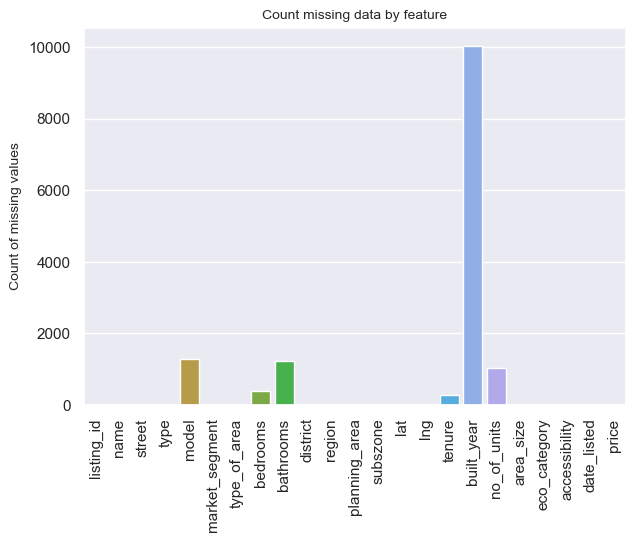

In [314]:
f, ax = plt.subplots(figsize=(7, 5))
plt.xticks(rotation='90')
sns.barplot(x=df_prices_train.isnull().sum().index, y=df_prices_train.isnull().sum())
#plt.xlabel('Features', fontsize=15)
plt.ylabel('Count of missing values', fontsize=10)
plt.title('Count missing data by feature', fontsize=10)

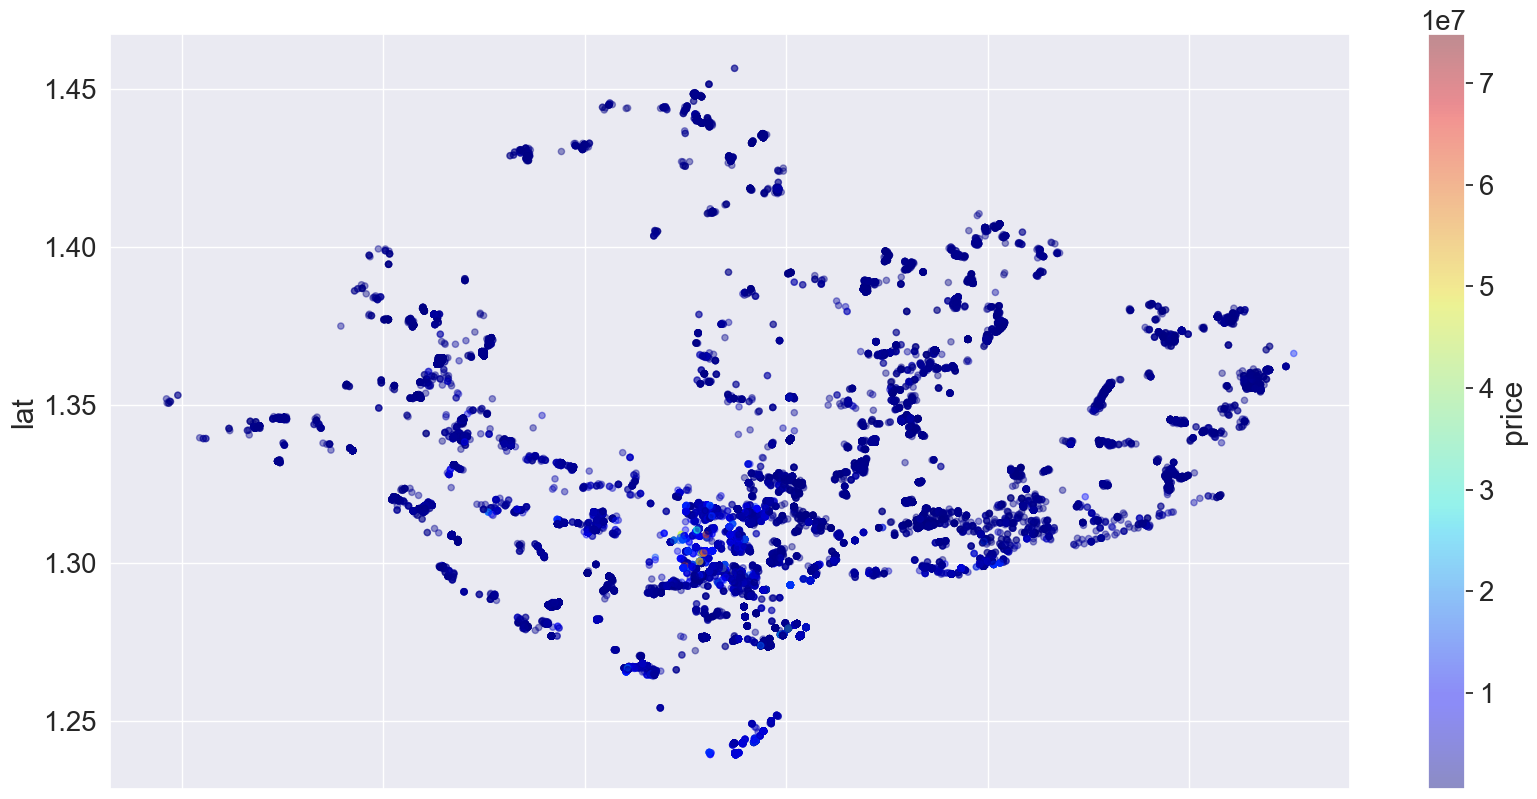

In [255]:
# Price Distribution Graph

ax=df_prices_train.plot(kind='scatter',x='lng',y='lat',figsize=(20,10),c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)

<AxesSubplot:xlabel='lng', ylabel='lat'>

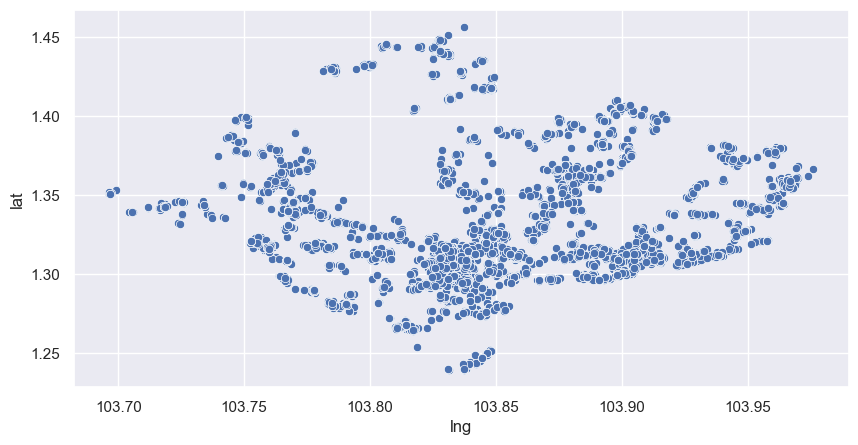

In [299]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=3, #height=4
sns.scatterplot(x="lng", y="lat", data=df_prices_train)

## Data Cleaning

Removing unwanted columns from data

In [256]:
df_prices_train = df_prices_train.drop(columns=TO_IGNORE)

In [257]:
# Columns to ignore
TO_IGNORE = [
    "subszone",
    "street", # we simply go by lat and long
    "listing_id",
    "name",
    "model", # we drop this because type is more than enough.
    "market_segment", # Only one value, ocr.
    "type_of_area", # Only one value, strata.
    "eco_category", # only one value, uncategorized.
    "accessibility", # only one value, guarded.
    "date_listed", # Redundant information,
    "built_year" # drop as there's too many missing cols, 10043
]

In [258]:
df_prices_train

,type,bedrooms,bathrooms,district,region,planning_area,lat,lng,tenure,no_of_units,area_size,price
0,condominium,3,4.0,4,central region,southern islands,1.239337,103.837487,leasehold/99 years,151.0,2336.0,5390000.0
1,apartment,3,3.0,11,central region,novena,1.319533,103.847030,freehold,24.0,1259.0,2310000.0
2,condominium,4,3.0,11,central region,novena,1.315656,103.844445,freehold,235.0,1959.0,5279500.0
3,condominium,3,2.0,14,east region,bedok,1.329367,103.905791,freehold,237.0,883.0,1843600.0
4,apartment,3,3.0,15,east region,bedok,1.309176,103.911352,freehold,36.0,1066.0,2262700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,condominium,3,3.0,8,central region,kallang,1.308896,103.863069,leasehold/99 years,600.0,1442.0,2750000.0
26044,condominium,3,3.0,10,central region,tanglin,1.316263,103.825190,freehold,17.0,1561.0,6449300.0
26045,condominium,2,2.0,18,east region,tampines,1.341303,103.953348,leasehold/99 years,301.0,883.0,1306800.0
26046,condominium,4,3.0,22,west region,jurong east,1.335557,103.742417,leasehold/99 years,738.0,1206.0,2420000.0


## Correlation-related plots

In [259]:
df_prices_train.corr()

,bathrooms,district,lat,lng,no_of_units,area_size,price
bathrooms,1.000000,-0.064970,-0.083864,-0.019363,-0.052380,0.738501,0.577072
district,-0.064970,1.000000,0.873757,0.144586,-0.075181,-0.170452,-0.219530
lat,-0.083864,0.873757,1.000000,0.136575,0.039133,-0.191119,-0.233966
lng,-0.019363,0.144586,0.136575,1.000000,-0.032089,-0.044925,-0.066026
no_of_units,-0.052380,-0.075181,0.039133,-0.032089,1.000000,-0.058612,-0.100886
area_size,0.738501,-0.170452,-0.191119,-0.044925,-0.058612,1.000000,0.869712
price,0.577072,-0.219530,-0.233966,-0.066026,-0.100886,0.869712,1.000000


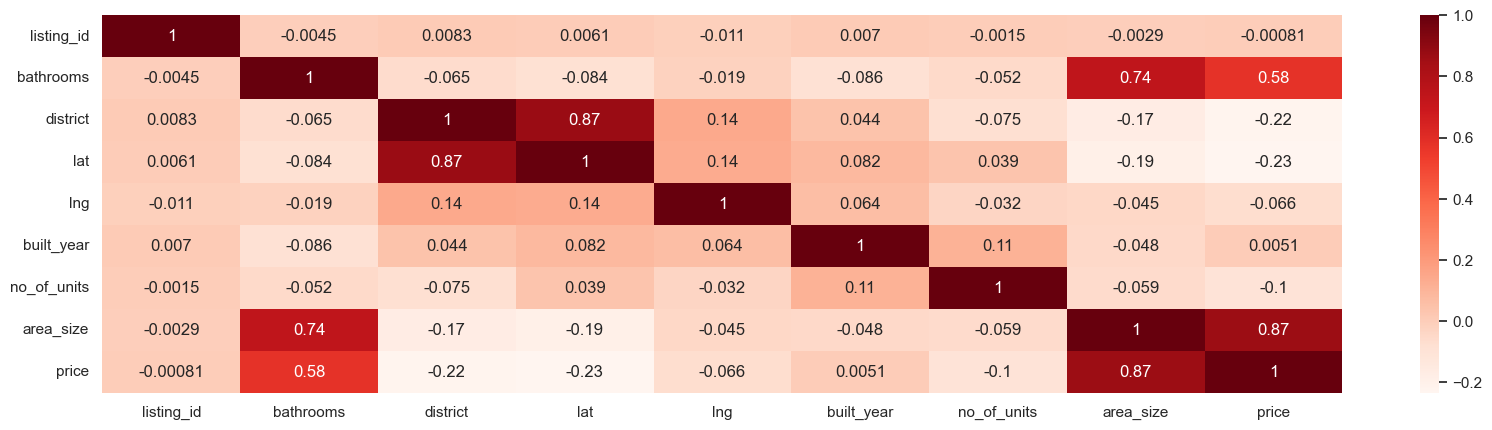

In [320]:
corr = df_prices_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()
plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()

In [274]:
# create correlation matrix with abs values
#corr_matrix = df_prices_train.corr().abs()
# change this value as needed, if 0.5 does not work for your scenario
#threshold = 0.5
#filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 
#plt.figure(figsize=(18,5))
#sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
#plt.show()

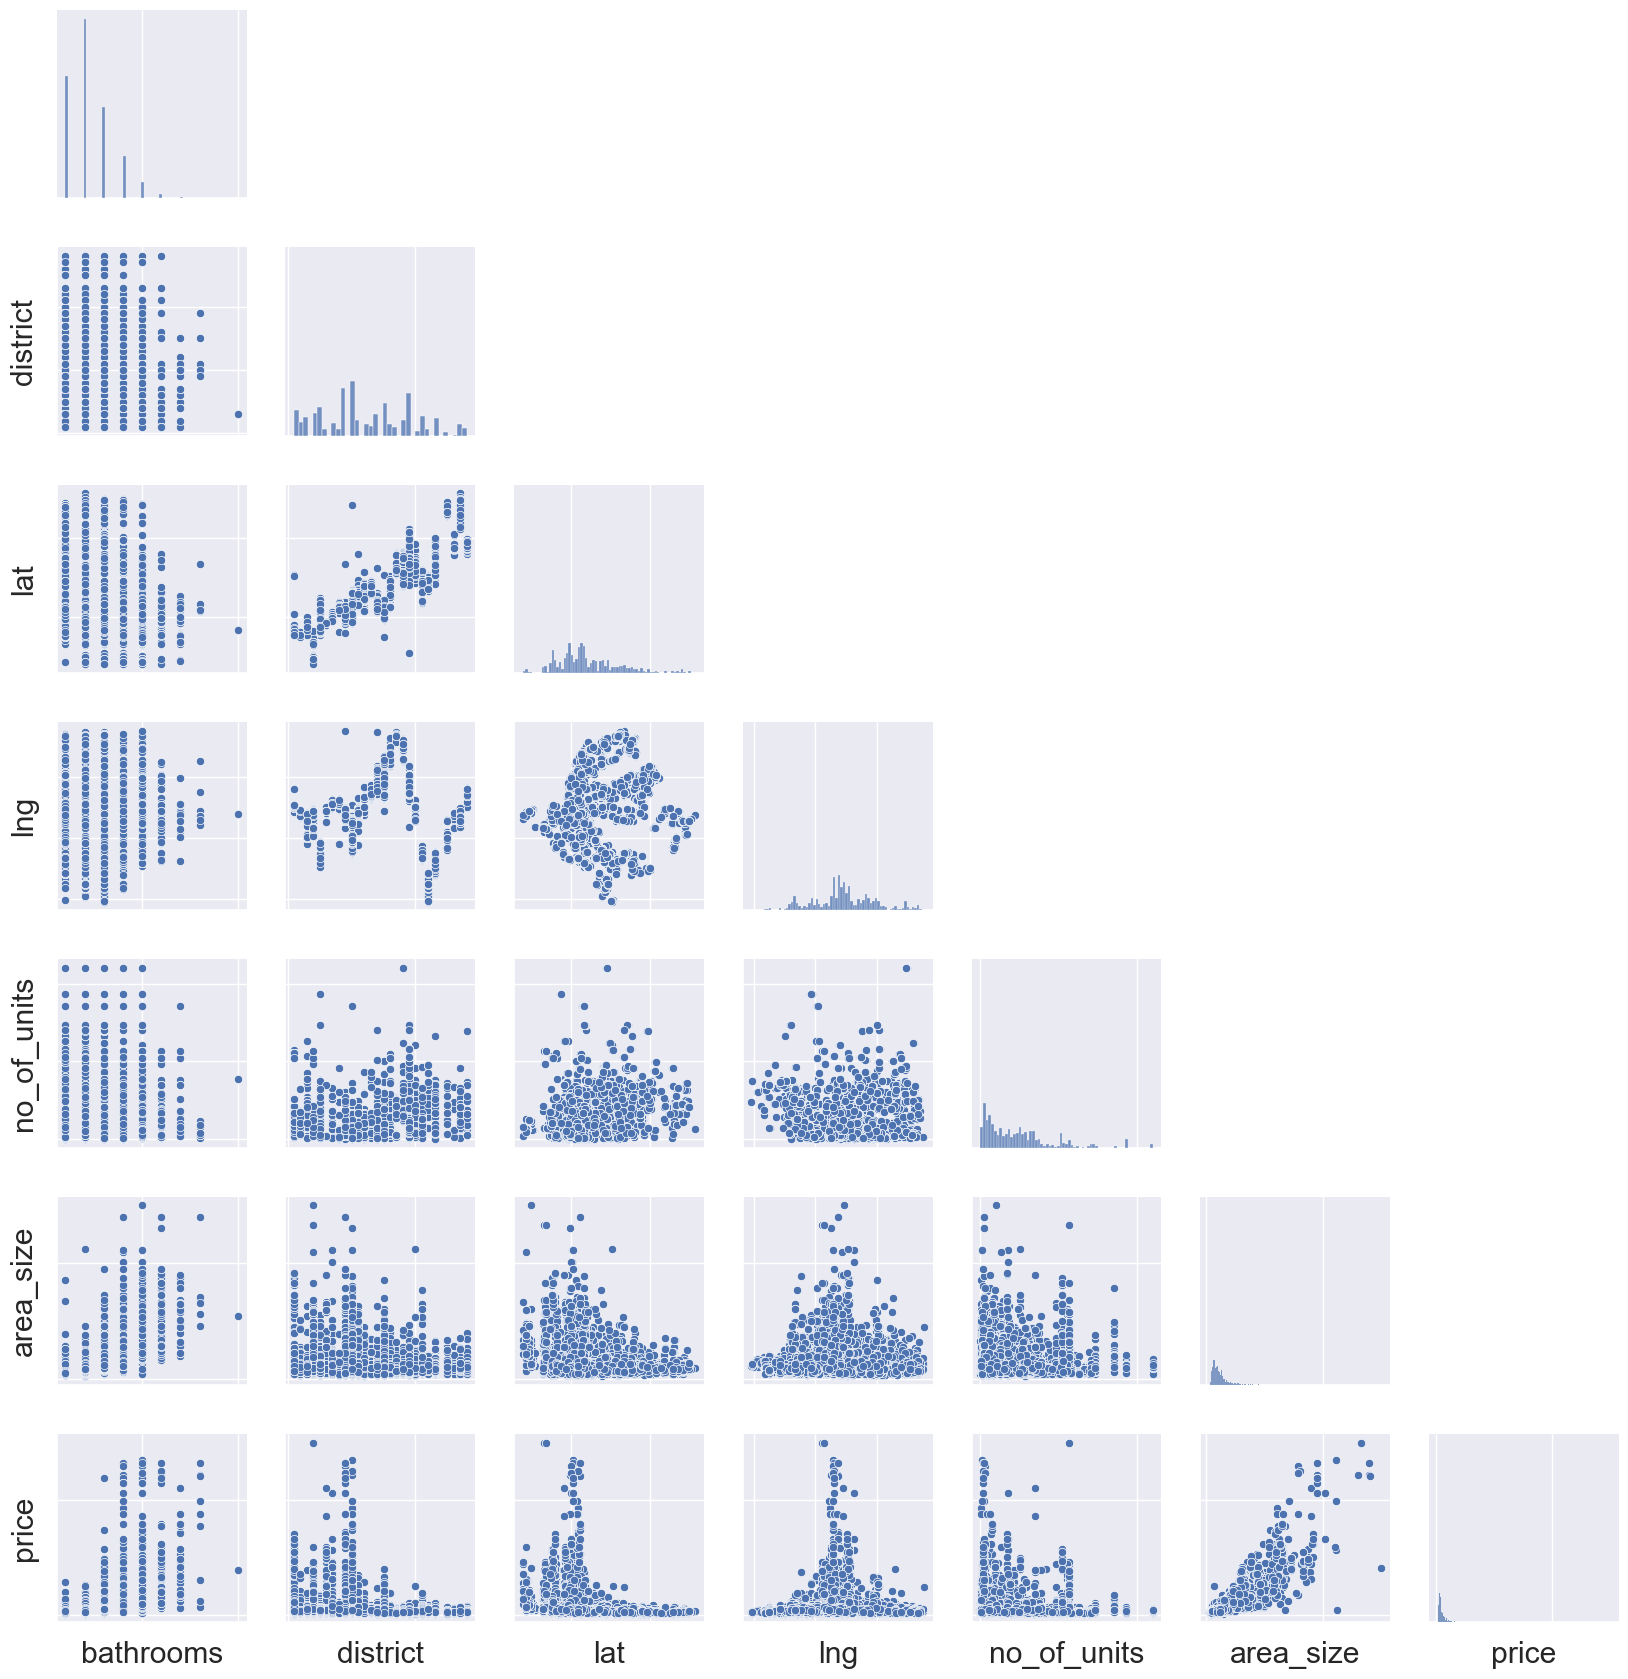

In [262]:
sns.set(font_scale=1.8)
matplotlib.rcParams['figure.figsize'] = (10, 10)
pp = sns.pairplot(df_prices_train, corner=True)

for ax in pp.axes.flat:
    if ax:
        ax.set_yticklabels([])
        ax.set_xticklabels([])

plt.show()

In [264]:
df_1 = df_prices_train.copy()

In [265]:
def process_bedroom_sum(expr) -> int:
    """
    Cleans the bedroom column by summing up + values.
    """
    if pd.isna(expr):
        return expr
    if str(expr) == '10+':
        return 10
    return eval(str(expr))


def process_bedroom_half(expr) -> int:
    if (type(expr) == str):
        if (len(expr) == 1):
            return int(expr)
        elif (len(expr) > 1):
            # assuming all values are of the type operand_1 + operand_2
            op_1, op_2 = int(expr[0]), int(expr[2])
            return op_1 + (op_2 / 2)
        else:
            # null value, returning NaN for completion sake
            return expr
    else:
        return expr
    
def categorical_to_onehot(df: pd.DataFrame, cols: List[str]) -> pd.DataFrame:
    one_hot = pd.get_dummies(df[cols])
    df = df.drop(columns=cols)
    df = df.join(one_hot)
    return df

def tenure_to_binary(expr: str) -> str:
    """
    Convert tenure to two one-hot columns:
        tenure_freehold: 999 years or freehold
        tenure_60: houses that are only 60 years.
        tenure_99: houses that have a 99 years leasehold.
    
    If the tenure is missing, we assume a standard 99 as that is the most frequent housing tenure model in Singapore.
    """
    if pd.isna(expr):
        return '99' # assume standard 99
    # get number of years
    res = re.search(r'(\d+)[^\d]+[yY]ears', expr)
    if res is None:
        return 'freehold'
    years = int(res.group(1))
    if years > 100:
        return 'freehold'
    elif years > 70:
        return '99'
    else:
        return '60'

In [266]:
# Then, we clean up the tenure fields to 3 categories: 60 years, 99 years, and freehold/999
df_1['tenure'] = df_1['tenure'].apply(tenure_to_binary)
df_1

,type,bedrooms,bathrooms,district,region,planning_area,lat,lng,tenure,no_of_units,area_size,price
0,condominium,3,4.0,4,central region,southern islands,1.239337,103.837487,99,151.0,2336.0,5390000.0
1,apartment,3,3.0,11,central region,novena,1.319533,103.847030,freehold,24.0,1259.0,2310000.0
2,condominium,4,3.0,11,central region,novena,1.315656,103.844445,freehold,235.0,1959.0,5279500.0
3,condominium,3,2.0,14,east region,bedok,1.329367,103.905791,freehold,237.0,883.0,1843600.0
4,apartment,3,3.0,15,east region,bedok,1.309176,103.911352,freehold,36.0,1066.0,2262700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,condominium,3,3.0,8,central region,kallang,1.308896,103.863069,99,600.0,1442.0,2750000.0
26044,condominium,3,3.0,10,central region,tanglin,1.316263,103.825190,freehold,17.0,1561.0,6449300.0
26045,condominium,2,2.0,18,east region,tampines,1.341303,103.953348,99,301.0,883.0,1306800.0
26046,condominium,4,3.0,22,west region,jurong east,1.335557,103.742417,99,738.0,1206.0,2420000.0


In [267]:
df_1 = categorical_to_onehot(df_1,['tenure','region','type','planning_area'])

In [268]:
df_1

,bedrooms,bathrooms,district,lat,lng,no_of_units,area_size,price,tenure_60,tenure_99,...,planning_area_sembawang,planning_area_sengkang,planning_area_serangoon,planning_area_singapore river,planning_area_southern islands,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun
0,3,4.0,4,1.239337,103.837487,151.0,2336.0,5390000.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3,3.0,11,1.319533,103.847030,24.0,1259.0,2310000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3.0,11,1.315656,103.844445,235.0,1959.0,5279500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2.0,14,1.329367,103.905791,237.0,883.0,1843600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3.0,15,1.309176,103.911352,36.0,1066.0,2262700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,3,3.0,8,1.308896,103.863069,600.0,1442.0,2750000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26044,3,3.0,10,1.316263,103.825190,17.0,1561.0,6449300.0,0,0,...,0,0,0,0,0,0,1,0,0,0
26045,2,2.0,18,1.341303,103.953348,301.0,883.0,1306800.0,0,1,...,0,0,0,0,0,1,0,0,0,0
26046,4,3.0,22,1.335557,103.742417,738.0,1206.0,2420000.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [269]:
df_1['bedrooms'] = df_1['bedrooms'].apply(process_bedroom_sum)
df_1

,bedrooms,bathrooms,district,lat,lng,no_of_units,area_size,price,tenure_60,tenure_99,...,planning_area_sembawang,planning_area_sengkang,planning_area_serangoon,planning_area_singapore river,planning_area_southern islands,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun
0,3.0,4.0,4,1.239337,103.837487,151.0,2336.0,5390000.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3.0,3.0,11,1.319533,103.847030,24.0,1259.0,2310000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,11,1.315656,103.844445,235.0,1959.0,5279500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.0,14,1.329367,103.905791,237.0,883.0,1843600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,3.0,15,1.309176,103.911352,36.0,1066.0,2262700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,3.0,3.0,8,1.308896,103.863069,600.0,1442.0,2750000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26044,3.0,3.0,10,1.316263,103.825190,17.0,1561.0,6449300.0,0,0,...,0,0,0,0,0,0,1,0,0,0
26045,2.0,2.0,18,1.341303,103.953348,301.0,883.0,1306800.0,0,1,...,0,0,0,0,0,1,0,0,0,0
26046,4.0,3.0,22,1.335557,103.742417,738.0,1206.0,2420000.0,0,1,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Reshma Jawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


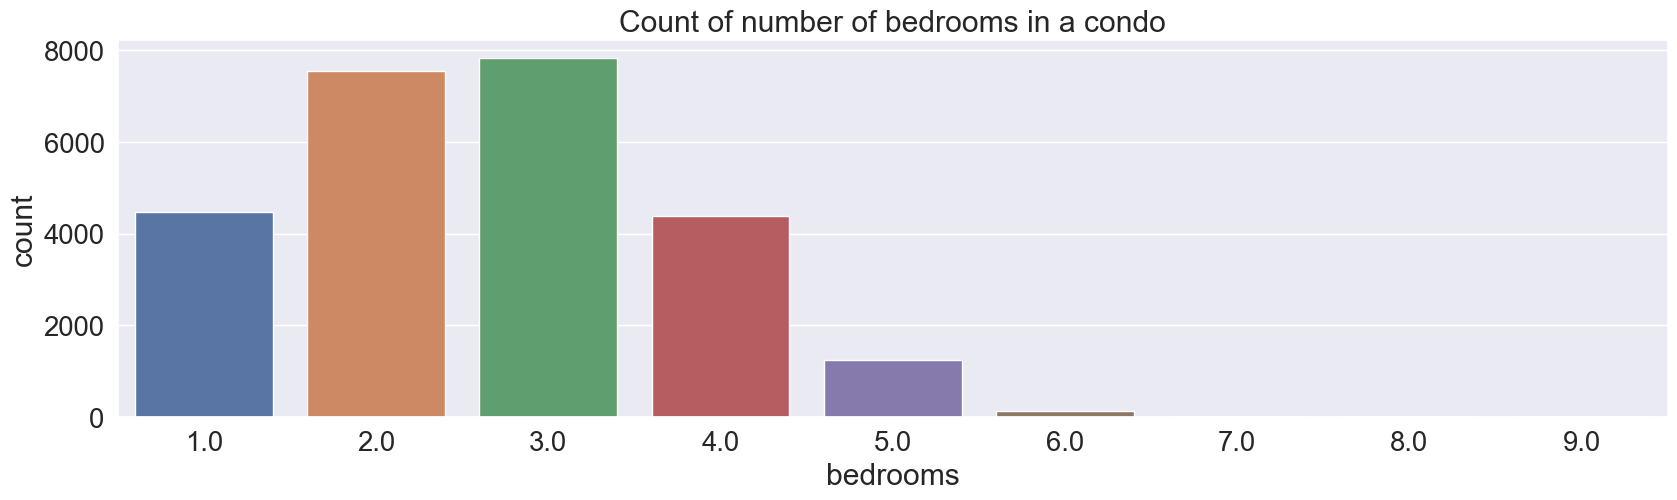

In [282]:
plt.figure(figsize=(20,5))
sns.countplot('bedrooms', data=df_1)
plt.title('Count of number of bedrooms in a condo')
plt.show()